In [8]:
# ============================================================================
# LEVEL 0: SETUP & IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


print("✓ Libraries loaded")

✓ Libraries loaded


In [9]:
# Load the raw data
df = pd.read_csv('../data/Car_Insurance_Claim.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (10000, 19)

First few rows:


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629,1.000,after 2015,0.000,1.000,10238,12000.000,sedan,0,0,0,0.000
1,750365,16-25,male,majority,0-9y,none,poverty,0.358,0.000,before 2015,0.000,0.000,10238,16000.000,sedan,0,0,0,1.000
2,199901,16-25,female,majority,0-9y,high school,working class,0.493,1.000,before 2015,0.000,0.000,10238,11000.000,sedan,0,0,0,0.000
3,478866,16-25,male,majority,0-9y,university,working class,0.206,1.000,before 2015,0.000,1.000,32765,11000.000,sedan,0,0,0,0.000
4,731664,26-39,male,majority,10-19y,none,working class,0.388,1.000,before 2015,0.000,0.000,32765,12000.000,sedan,2,0,1,1.000


In [10]:
# Check data types and missing values
print("Data Info:")
print(df.info())

print("\n" + "="*50)
print("Missing Values:")
print(df.isna().sum())

print("\n" + "="*50)
print(df['OUTCOME'].value_counts())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000

In [11]:
# ============================================================================
# LEVEL 1: LOAD & INITIAL EXPLORATION
# ============================================================================
# Load the raw data
df = pd.read_csv('../data/Car_Insurance_Claim.csv')

print("="*70)
print("LEVEL 1: INITIAL DATA EXPLORATION")
print("="*70)

print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 First 5 rows:")
print(df.head())

print(f"\n📋 Last 5 rows:")
print(df.tail())

print(f"\n🔍 Data Types:")
print(df.dtypes)

print(f"\n📊 Memory Usage:")
print(f"{df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



LEVEL 1: INITIAL DATA EXPLORATION

📊 Dataset Shape: 10000 rows × 19 columns

📋 First 5 rows:
       ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class         0.629              1.000   after 2015    0.000   
1        poverty         0.358              0.000  before 2015    0.000   
2  working class         0.493              1.000  before 2015    0.000   
3  working class         0.206              1.000  before 2015    0.000   
4  working class         0.388              1.000  before 2015    0.000   

   CHILDREN  POSTAL_CODE  ANNUAL_MI

In [12]:
# ============================================================================
# LEVEL 2: DATA QUALITY ASSESSMENT
# ============================================================================
print("\n" + "="*70)
print("LEVEL 2: DATA QUALITY ASSESSMENT")
print("="*70)

# Check for missing values
print("\n❌ Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates}")

# Check for duplicate IDs
duplicate_ids = df['ID'].duplicated().sum()
print(f"🔄 Duplicate IDs: {duplicate_ids}")

# Unique values in categorical columns
print("\n🏷️ Unique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} unique values")
    print(f"    Values: {df[col].unique()[:10]}")  # Show first 10

# Check target variable
print("\n🎯 Target Variable (OUTCOME) Distribution:")
print(df['OUTCOME'].value_counts())
print(f"\nClaim Rate: {df['OUTCOME'].mean()*100:.2f}%")



LEVEL 2: DATA QUALITY ASSESSMENT

❌ Missing Values:
                Missing_Count  Percentage
CREDIT_SCORE              982       9.820
ANNUAL_MILEAGE            957       9.570

🔄 Duplicate Rows: 0
🔄 Duplicate IDs: 0

🏷️ Unique Values in Categorical Columns:
  AGE: 4 unique values
    Values: ['65+' '16-25' '26-39' '40-64']
  GENDER: 2 unique values
    Values: ['female' 'male']
  RACE: 2 unique values
    Values: ['majority' 'minority']
  DRIVING_EXPERIENCE: 4 unique values
    Values: ['0-9y' '10-19y' '20-29y' '30y+']
  EDUCATION: 3 unique values
    Values: ['high school' 'none' 'university']
  INCOME: 4 unique values
    Values: ['upper class' 'poverty' 'working class' 'middle class']
  VEHICLE_YEAR: 2 unique values
    Values: ['after 2015' 'before 2015']
  VEHICLE_TYPE: 2 unique values
    Values: ['sedan' 'sports car']

🎯 Target Variable (OUTCOME) Distribution:
OUTCOME
0.000    6867
1.000    3133
Name: count, dtype: int64

Claim Rate: 31.33%


In [13]:
# ============================================================================
# LEVEL 3: STATISTICAL SUMMARY & OUTLIERS
# ============================================================================
print("\n" + "="*70)
print("LEVEL 3: STATISTICAL SUMMARY & OUTLIER DETECTION")
print("="*70)

# Numerical columns summary
print("\n📈 Numerical Features Summary:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

# Check for outliers using IQR method
print("\n⚠️ Outlier Detection (IQR Method):")
for col in ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 
            'DUIS', 'PAST_ACCIDENTS']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        print(f"  {col}: {outliers} outliers ({outliers/len(df)*100:.2f}%)")




LEVEL 3: STATISTICAL SUMMARY & OUTLIER DETECTION

📈 Numerical Features Summary:
              ID  CREDIT_SCORE  VEHICLE_OWNERSHIP   MARRIED  CHILDREN  \
count  10000.000      9018.000          10000.000 10000.000 10000.000   
mean  500521.907         0.516              0.697     0.498     0.689   
std   290030.769         0.138              0.460     0.500     0.463   
min      101.000         0.053              0.000     0.000     0.000   
25%   249638.500         0.417              0.000     0.000     0.000   
50%   501777.000         0.525              1.000     0.000     1.000   
75%   753974.500         0.618              1.000     1.000     1.000   
max   999976.000         0.961              1.000     1.000     1.000   

       POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS      DUIS  \
count    10000.000        9043.000            10000.000 10000.000   
mean     19864.548       11697.003                1.483     0.239   
std      18915.614        2818.435                2.24


LEVEL 4: EXPLORATORY DATA ANALYSIS - VISUALIZATIONS


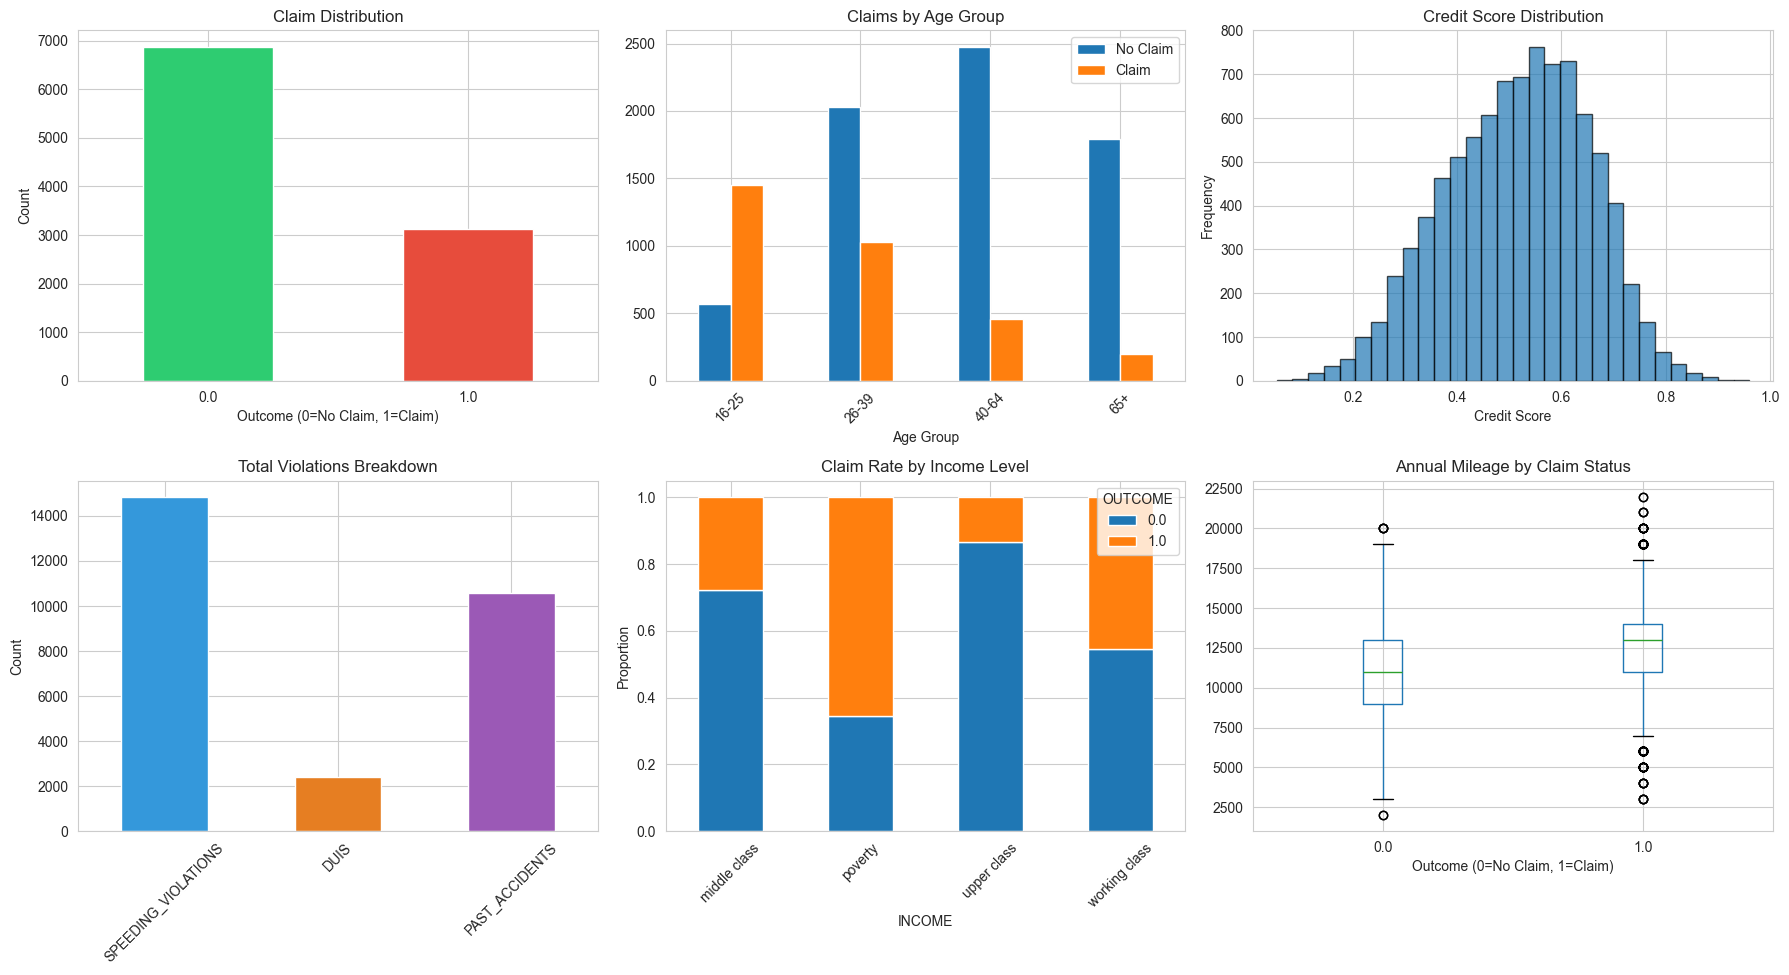

✓ EDA visualizations saved to '../outputs/eda_overview.png'


In [15]:

# ============================================================================
# LEVEL 4: EXPLORATORY DATA ANALYSIS (EDA) - VISUALIZATIONS
# ============================================================================
print("\n" + "="*70)
print("LEVEL 4: EXPLORATORY DATA ANALYSIS - VISUALIZATIONS")
print("="*70)

# Create EDA visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Insurance Data - EDA Overview', fontsize=16, fontweight='bold')

# 1. Target distribution
df['OUTCOME'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('Claim Distribution')
axes[0,0].set_xlabel('Outcome (0=No Claim, 1=Claim)')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=0)

# 2. Age distribution by outcome
pd.crosstab(df['AGE'], df['OUTCOME']).plot(kind='bar', ax=axes[0,1], stacked=False)
axes[0,1].set_title('Claims by Age Group')
axes[0,1].set_xlabel('Age Group')
axes[0,1].legend(['No Claim', 'Claim'])
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Credit Score distribution
axes[0,2].hist(df['CREDIT_SCORE'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0,2].set_title('Credit Score Distribution')
axes[0,2].set_xlabel('Credit Score')
axes[0,2].set_ylabel('Frequency')

# 4. Violations breakdown
violations_df = df[['SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']].sum()
violations_df.plot(kind='bar', ax=axes[1,0], color=['#3498db', '#e67e22', '#9b59b6'])
axes[1,0].set_title('Total Violations Breakdown')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Income vs Outcome
pd.crosstab(df['INCOME'], df['OUTCOME'], normalize='index').plot(kind='bar', ax=axes[1,1], stacked=True)
axes[1,1].set_title('Claim Rate by Income Level')
axes[1,1].set_ylabel('Proportion')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Annual Mileage by Outcome
df.boxplot(column='ANNUAL_MILEAGE', by='OUTCOME', ax=axes[1,2])
axes[1,2].set_title('Annual Mileage by Claim Status')
axes[1,2].set_xlabel('Outcome (0=No Claim, 1=Claim)')
plt.suptitle('')  # Remove auto title

plt.tight_layout()
plt.savefig('../outputs/eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ EDA visualizations saved to '../outputs/eda_overview.png'")



In [16]:

# ============================================================================
# LEVEL 5: MISSING VALUE ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("LEVEL 5: MISSING VALUE ANALYSIS & IMPUTATION")
print("="*70)

# Create a copy for cleaning
df_clean = df.copy()

# Analyze CREDIT_SCORE missing values
print("\n🔍 CREDIT_SCORE Missing Value Analysis:")
print(f"Missing: {df_clean['CREDIT_SCORE'].isnull().sum()} ({df_clean['CREDIT_SCORE'].isnull().sum()/len(df_clean)*100:.2f}%)")
print(f"Mean: {df_clean['CREDIT_SCORE'].mean():.3f}")
print(f"Median: {df_clean['CREDIT_SCORE'].median():.3f}")
print(f"Std: {df_clean['CREDIT_SCORE'].std():.3f}")

# Impute CREDIT_SCORE with median (robust to outliers)
credit_median = df_clean['CREDIT_SCORE'].median()
df_clean['CREDIT_SCORE'].fillna(credit_median, inplace=True)
print(f"✓ Imputed CREDIT_SCORE with median: {credit_median:.3f}")

# Analyze ANNUAL_MILEAGE missing values
print("\n🔍 ANNUAL_MILEAGE Missing Value Analysis:")
print(f"Missing: {df['ANNUAL_MILEAGE'].isnull().sum()} ({df['ANNUAL_MILEAGE'].isnull().sum()/len(df)*100:.2f}%)")
print(f"Mean: {df['ANNUAL_MILEAGE'].mean():.0f}")
print(f"Median: {df['ANNUAL_MILEAGE'].median():.0f}")
print(f"Std: {df['ANNUAL_MILEAGE'].std():.0f}")

# Impute ANNUAL_MILEAGE with median
mileage_median = df_clean['ANNUAL_MILEAGE'].median()
df_clean['ANNUAL_MILEAGE'].fillna(mileage_median, inplace=True)
print(f"✓ Imputed ANNUAL_MILEAGE with median: {mileage_median:.0f}")

# Verify no missing values remain
print(f"\n✓ Remaining missing values: {df_clean.isnull().sum().sum()}")



LEVEL 5: MISSING VALUE ANALYSIS & IMPUTATION

🔍 CREDIT_SCORE Missing Value Analysis:
Missing: 982 (9.82%)
Mean: 0.516
Median: 0.525
Std: 0.138
✓ Imputed CREDIT_SCORE with median: 0.525

🔍 ANNUAL_MILEAGE Missing Value Analysis:
Missing: 957 (9.57%)
Mean: 11697
Median: 12000
Std: 2818
✓ Imputed ANNUAL_MILEAGE with median: 12000

✓ Remaining missing values: 0


In [17]:
# ============================================================================
# LEVEL 6: CATEGORICAL VARIABLE ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("LEVEL 6: CATEGORICAL VARIABLE ANALYSIS")
print("="*70)

# Analyze each categorical variable
categorical_features = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 
                        'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']

for feature in categorical_features:
    print(f"\n📊 {feature}:")
    value_counts = df_clean[feature].value_counts()
    print(value_counts)
    
    # Calculate claim rate by category
    claim_rate = df_clean.groupby(feature)['OUTCOME'].mean() * 100
    print(f"\nClaim Rate by {feature}:")
    print(claim_rate.sort_values(ascending=False))




LEVEL 6: CATEGORICAL VARIABLE ANALYSIS

📊 AGE:
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64

Claim Rate by AGE:
AGE
16-25   71.825
26-39   33.692
40-64   15.592
65+      9.849
Name: OUTCOME, dtype: float64

📊 GENDER:
GENDER
female    5010
male      4990
Name: count, dtype: int64

Claim Rate by GENDER:
GENDER
male     36.313
female   26.367
Name: OUTCOME, dtype: float64

📊 RACE:
RACE
majority    9012
minority     988
Name: count, dtype: int64

Claim Rate by RACE:
RACE
minority   32.490
majority   31.203
Name: OUTCOME, dtype: float64

📊 DRIVING_EXPERIENCE:
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64

Claim Rate by DRIVING_EXPERIENCE:
DRIVING_EXPERIENCE
0-9y     62.805
10-19y   23.856
20-29y    5.144
30y+      1.901
Name: OUTCOME, dtype: float64

📊 EDUCATION:
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64

Claim Rate by EDUCATION:
EDUCATIO

In [18]:

# ============================================================================
# LEVEL 7: FEATURE ENGINEERING - RISK INDICATORS
# ============================================================================
print("\n" + "="*70)
print("LEVEL 7: FEATURE ENGINEERING - RISK INDICATORS")
print("="*70)

# 1. Total Violations
df_clean['TOTAL_VIOLATIONS'] = (df_clean['SPEEDING_VIOLATIONS'] + 
                                 df_clean['DUIS'] + 
                                 df_clean['PAST_ACCIDENTS'])
print(f"✓ Created TOTAL_VIOLATIONS")
print(f"  Range: {df_clean['TOTAL_VIOLATIONS'].min()} to {df_clean['TOTAL_VIOLATIONS'].max()}")
print(f"  Mean: {df_clean['TOTAL_VIOLATIONS'].mean():.2f}")

# 2. Has any violation flag
df_clean['HAS_VIOLATIONS'] = (df_clean['TOTAL_VIOLATIONS'] > 0).astype(int)
print(f"\n✓ Created HAS_VIOLATIONS")
print(f"  Customers with violations: {df_clean['HAS_VIOLATIONS'].sum()} ({df_clean['HAS_VIOLATIONS'].mean()*100:.1f}%)")

# 3. Critical risk flag (DUI)
df_clean['HAS_DUI'] = (df_clean['DUIS'] > 0).astype(int)
print(f"\n✓ Created HAS_DUI")
print(f"  Customers with DUI: {df_clean['HAS_DUI'].sum()} ({df_clean['HAS_DUI'].mean()*100:.1f}%)")

# 4. Age group numeric (for ordering)
age_mapping = {'16-25': 1, '26-39': 2, '40-64': 3, '65+': 4}
df_clean['AGE_NUMERIC'] = df_clean['AGE'].map(age_mapping)
print(f"\n✓ Created AGE_NUMERIC (ordinal encoding)")

# 5. Driving experience numeric
exp_mapping = {'0-9y': 1, '10-19y': 2, '20-29y': 3, '30y+': 4}
df_clean['EXPERIENCE_NUMERIC'] = df_clean['DRIVING_EXPERIENCE'].map(exp_mapping)
print(f"✓ Created EXPERIENCE_NUMERIC (ordinal encoding)")

# 6. Education numeric
edu_mapping = {'none': 0, 'high school': 1, 'university': 2}
df_clean['EDUCATION_NUMERIC'] = df_clean['EDUCATION'].map(edu_mapping)
print(f"✓ Created EDUCATION_NUMERIC (ordinal encoding)")

# 7. Income numeric
income_mapping = {'poverty': 0, 'working class': 1, 'middle class': 2, 'upper class': 3}
df_clean['INCOME_NUMERIC'] = df_clean['INCOME'].map(income_mapping)
print(f"✓ Created INCOME_NUMERIC (ordinal encoding)")

# 8. Vehicle age category
df_clean['VEHICLE_NEW'] = (df_clean['VEHICLE_YEAR'] == 'after 2015').astype(int)
print(f"\n✓ Created VEHICLE_NEW")
print(f"  New vehicles (after 2015): {df_clean['VEHICLE_NEW'].sum()} ({df_clean['VEHICLE_NEW'].mean()*100:.1f}%)")

# 9. High mileage indicator
mileage_75th = df_clean['ANNUAL_MILEAGE'].quantile(0.75)
df_clean['HIGH_MILEAGE'] = (df_clean['ANNUAL_MILEAGE'] > mileage_75th).astype(int)
print(f"\n✓ Created HIGH_MILEAGE (>{mileage_75th:.0f} miles)")
print(f"  High mileage drivers: {df_clean['HIGH_MILEAGE'].sum()} ({df_clean['HIGH_MILEAGE'].mean()*100:.1f}%)")

# 10. Young inexperienced driver (highest risk)
df_clean['YOUNG_INEXPERIENCED'] = ((df_clean['AGE_NUMERIC'] == 1) & 
                                    (df_clean['EXPERIENCE_NUMERIC'] == 1)).astype(int)
print(f"\n✓ Created YOUNG_INEXPERIENCED")
print(f"  Young & inexperienced: {df_clean['YOUNG_INEXPERIENCED'].sum()} ({df_clean['YOUNG_INEXPERIENCED'].mean()*100:.1f}%)")

# 11. Low credit flag
df_clean['LOW_CREDIT'] = (df_clean['CREDIT_SCORE'] < 0.4).astype(int)
print(f"\n✓ Created LOW_CREDIT (<0.4)")
print(f"  Low credit customers: {df_clean['LOW_CREDIT'].sum()} ({df_clean['LOW_CREDIT'].mean()*100:.1f}%)")



LEVEL 7: FEATURE ENGINEERING - RISK INDICATORS
✓ Created TOTAL_VIOLATIONS
  Range: 0 to 28
  Mean: 2.78

✓ Created HAS_VIOLATIONS
  Customers with violations: 5945 (59.5%)

✓ Created HAS_DUI
  Customers with DUI: 1882 (18.8%)

✓ Created AGE_NUMERIC (ordinal encoding)
✓ Created EXPERIENCE_NUMERIC (ordinal encoding)
✓ Created EDUCATION_NUMERIC (ordinal encoding)
✓ Created INCOME_NUMERIC (ordinal encoding)

✓ Created VEHICLE_NEW
  New vehicles (after 2015): 3033 (30.3%)

✓ Created HIGH_MILEAGE (>13000 miles)
  High mileage drivers: 2360 (23.6%)

✓ Created YOUNG_INEXPERIENCED
  Young & inexperienced: 2016 (20.2%)

✓ Created LOW_CREDIT (<0.4)
  Low credit customers: 1950 (19.5%)



LEVEL 8: COMPOSITE RISK SCORE CALCULATION
✓ Calculated RISK_SCORE

Risk Score Statistics:
count   10000.000
mean       16.782
std         9.779
min         2.500
25%        10.500
50%        13.000
75%        20.500
max        98.500
Name: RISK_SCORE, dtype: float64


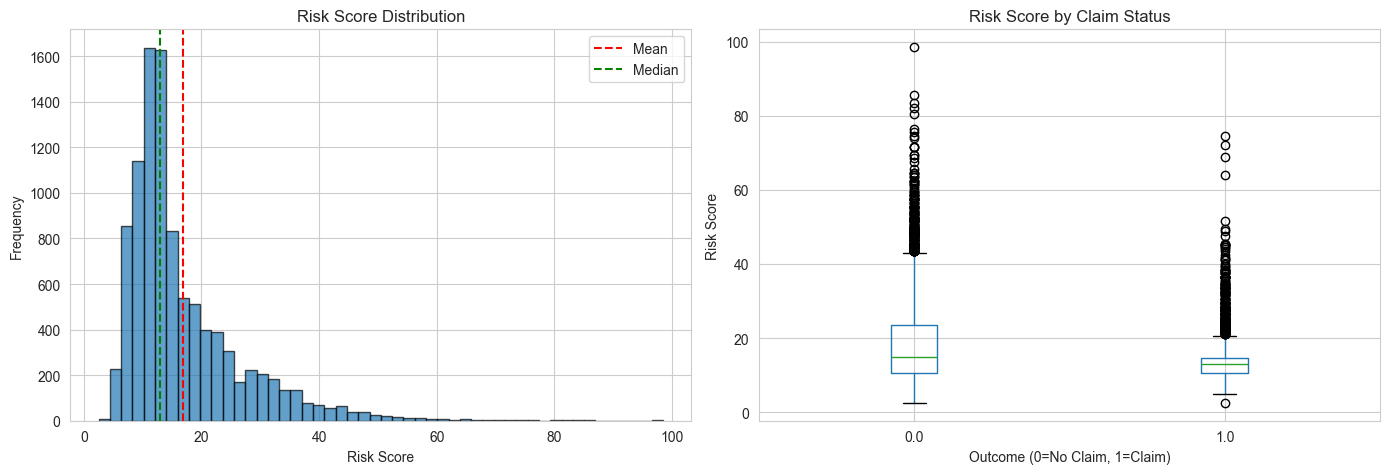

✓ Risk score visualizations saved


In [19]:
# ============================================================================
# LEVEL 8: COMPOSITE RISK SCORE CALCULATION
# ============================================================================
print("\n" + "="*70)
print("LEVEL 8: COMPOSITE RISK SCORE CALCULATION")
print("="*70)

# Calculate weighted risk score
df_clean['RISK_SCORE'] = (
    df_clean['SPEEDING_VIOLATIONS'] * 2.0 +    # Speeding violations
    df_clean['DUIS'] * 10.0 +                  # DUIs (very serious)
    df_clean['PAST_ACCIDENTS'] * 3.0 +         # Past accidents
    (5 - df_clean['AGE_NUMERIC']) * 1.5 +      # Younger = higher risk
    (5 - df_clean['EXPERIENCE_NUMERIC']) * 1.0 + # Less experience = higher
    df_clean['HIGH_MILEAGE'] * 2.0 +           # High mileage
    df_clean['LOW_CREDIT'] * 2.0 +             # Low credit
    (1 - df_clean['VEHICLE_NEW']) * 1.0        # Older vehicle
)

print(f"✓ Calculated RISK_SCORE")
print(f"\nRisk Score Statistics:")
print(df_clean['RISK_SCORE'].describe())

# Visualize risk score distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['RISK_SCORE'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Risk Score Distribution')
plt.axvline(df_clean['RISK_SCORE'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_clean['RISK_SCORE'].median(), color='green', linestyle='--', label='Median')
plt.legend()

plt.subplot(1, 2, 2)
df_clean.boxplot(column='RISK_SCORE', by='OUTCOME', ax=plt.gca())
plt.xlabel('Outcome (0=No Claim, 1=Claim)')
plt.ylabel('Risk Score')
plt.title('Risk Score by Claim Status')
plt.suptitle('')

plt.tight_layout()
plt.savefig('../outputs/risk_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Risk score visualizations saved")



LEVEL 9: RISK CATEGORIZATION FOR UNDERWRITING
Risk Score Quartiles:
  Q1 (25th percentile): 10.50
  Q2 (50th percentile): 13.00
  Q3 (75th percentile): 20.50

✓ Risk categories assigned

Risk Category Distribution:
RISK_CATEGORY
Very High    4311
Low          2536
Moderate     2302
High          851
Name: count, dtype: int64

Risk Category Percentages:
RISK_CATEGORY
Very High   43.110
Low         25.360
Moderate    23.020
High         8.510
Name: count, dtype: float64

Claim Rate by Risk Category:
               Claim_Rate  Count
RISK_CATEGORY                   
Moderate           61.164   2302
High               51.116    851
Low                30.994   2536
Very High          11.691   4311


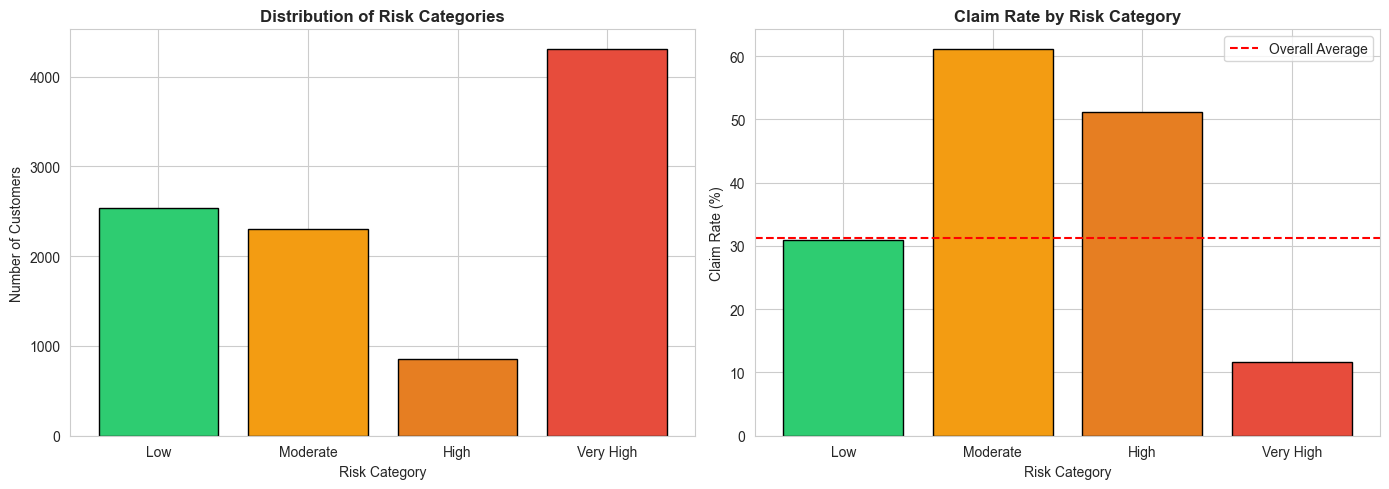

✓ Risk category visualizations saved


In [22]:
# ============================================================================
# LEVEL 9: RISK CATEGORIZATION
# ============================================================================
print("\n" + "="*70)
print("LEVEL 9: RISK CATEGORIZATION FOR UNDERWRITING")
print("="*70)

# Calculate quartiles for risk categorization
q25 = df_clean['RISK_SCORE'].quantile(0.25)
q50 = df_clean['RISK_SCORE'].quantile(0.50)
q75 = df_clean['RISK_SCORE'].quantile(0.75)

print(f"Risk Score Quartiles:")
print(f"  Q1 (25th percentile): {q25:.2f}")
print(f"  Q2 (50th percentile): {q50:.2f}")
print(f"  Q3 (75th percentile): {q75:.2f}")

# Assign risk categories
def assign_risk_category(row):
    """Assign risk category based on score and critical factors"""
    
    # Critical overrides
    if row['DUIS'] > 0:
        return 'Very High'
    
    if row['TOTAL_VIOLATIONS'] >= 3:
        return 'Very High'
    
    # Score-based categorization
    score = row['RISK_SCORE']
    if score <= q25:
        return 'Low'
    elif score <= q50:
        return 'Moderate'
    elif score <= q75:
        return 'High'
    else:
        return 'Very High'

df_clean['RISK_CATEGORY'] = df_clean.apply(assign_risk_category, axis=1)

print(f"\n✓ Risk categories assigned")
print(f"\nRisk Category Distribution:")
risk_dist = df_clean['RISK_CATEGORY'].value_counts()
print(risk_dist)
print(f"\nRisk Category Percentages:")
print((risk_dist / len(df_clean) * 100).round(2))

# Claim rate by risk category
print(f"\nClaim Rate by Risk Category:")
claim_by_risk = df_clean.groupby('RISK_CATEGORY')['OUTCOME'].agg(['mean', 'count'])
claim_by_risk.columns = ['Claim_Rate', 'Count']
claim_by_risk['Claim_Rate'] = claim_by_risk['Claim_Rate'] * 100
claim_by_risk = claim_by_risk.sort_values('Claim_Rate', ascending=False)
print(claim_by_risk)

# Visualize risk categories
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Risk category distribution
risk_order = ['Low', 'Moderate', 'High', 'Very High']
risk_colors = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
risk_counts = df_clean['RISK_CATEGORY'].value_counts().reindex(risk_order)
axes[0].bar(risk_order, risk_counts, color=risk_colors, edgecolor='black')
axes[0].set_title('Distribution of Risk Categories', fontweight='bold')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Risk Category')

# Claim rate by risk category
claim_rates = df_clean.groupby('RISK_CATEGORY')['OUTCOME'].mean().reindex(risk_order) * 100
axes[1].bar(risk_order, claim_rates, color=risk_colors, edgecolor='black')
axes[1].set_title('Claim Rate by Risk Category', fontweight='bold')
axes[1].set_ylabel('Claim Rate (%)')
axes[1].set_xlabel('Risk Category')
axes[1].axhline(y=df_clean['OUTCOME'].mean()*100, color='red', linestyle='--', label='Overall Average')
axes[1].legend()

plt.tight_layout()
plt.savefig('../outputs/risk_categories.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Risk category visualizations saved")



In [21]:
# ============================================================================
# LEVEL 10: ENCODE CATEGORICAL FEATURES
# ============================================================================
print("\n" + "="*70)
print("LEVEL 10: ENCODE CATEGORICAL FEATURES FOR MODELING")
print("="*70)

from sklearn.preprocessing import LabelEncoder

# Features to encode
categorical_to_encode = ['GENDER', 'RACE', 'VEHICLE_TYPE', 'RISK_CATEGORY']

label_encoders = {}

for col in categorical_to_encode:
    le = LabelEncoder()
    df_clean[f'{col}_ENCODED'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}")
    print(f"  Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")




LEVEL 10: ENCODE CATEGORICAL FEATURES FOR MODELING
✓ Encoded GENDER
  Mapping: {'female': 0, 'male': 1}
✓ Encoded RACE
  Mapping: {'majority': 0, 'minority': 1}
✓ Encoded VEHICLE_TYPE
  Mapping: {'sedan': 0, 'sports car': 1}
✓ Encoded RISK_CATEGORY
  Mapping: {'High': 0, 'Low': 1, 'Moderate': 2, 'Very High': 3}


In [23]:

# ============================================================================
# LEVEL 11: FINAL DATA PREPARATION & EXPORT
# ============================================================================
print("\n" + "="*70)
print("LEVEL 11: FINAL DATA PREPARATION & EXPORT")
print("="*70)

# Summary of the cleaned dataset
print(f"\n📊 Final Dataset Summary:")
print(f"  Shape: {df_clean.shape}")
print(f"  Missing values: {df_clean.isnull().sum().sum()}")
print(f"  Total features: {len(df_clean.columns)}")
print(f"  Original features: {len(df.columns)}")
print(f"  New features created: {len(df_clean.columns) - len(df.columns)}")

# List new features
new_features = [col for col in df_clean.columns if col not in df.columns]
print(f"\n🆕 New Features Created ({len(new_features)}):")
for i, feat in enumerate(new_features, 1):
    print(f"  {i}. {feat}")

# Save cleaned data
df_clean.to_csv('../data/cleaned_insurance_data.csv', index=False)
print(f"\n✓ Cleaned data saved to '../data/cleaned_insurance_data.csv'")

# Create a modeling-ready dataset with selected features
modeling_features = [
    # Demographics
    'AGE_NUMERIC', 'GENDER_ENCODED', 'RACE_ENCODED', 
    'EXPERIENCE_NUMERIC', 'EDUCATION_NUMERIC', 'INCOME_NUMERIC',
    
    # Financial & Vehicle
    'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_NEW', 
    'VEHICLE_TYPE_ENCODED', 'ANNUAL_MILEAGE',
    
    # Personal
    'MARRIED', 'CHILDREN',
    
    # Violations
    'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'TOTAL_VIOLATIONS',
    
    # Risk Indicators
    'HAS_VIOLATIONS', 'HAS_DUI', 'HIGH_MILEAGE', 'YOUNG_INEXPERIENCED', 
    'LOW_CREDIT', 'RISK_SCORE', 'RISK_CATEGORY_ENCODED',
    
    # Target
    'OUTCOME'
]

df_modeling = df_clean[modeling_features + ['ID']].copy()
df_modeling.to_csv('../data/modeling_ready_data.csv', index=False)
print(f"✓ Modeling-ready data saved to '../data/modeling_ready_data.csv'")
print(f"  Features for modeling: {len(modeling_features) - 1} (excluding target)")




LEVEL 11: FINAL DATA PREPARATION & EXPORT

📊 Final Dataset Summary:
  Shape: (10000, 36)
  Missing values: 0
  Total features: 36
  Original features: 19
  New features created: 17

🆕 New Features Created (17):
  1. TOTAL_VIOLATIONS
  2. HAS_VIOLATIONS
  3. HAS_DUI
  4. AGE_NUMERIC
  5. EXPERIENCE_NUMERIC
  6. EDUCATION_NUMERIC
  7. INCOME_NUMERIC
  8. VEHICLE_NEW
  9. HIGH_MILEAGE
  10. YOUNG_INEXPERIENCED
  11. LOW_CREDIT
  12. RISK_SCORE
  13. RISK_CATEGORY
  14. GENDER_ENCODED
  15. RACE_ENCODED
  16. VEHICLE_TYPE_ENCODED
  17. RISK_CATEGORY_ENCODED

✓ Cleaned data saved to '../data/cleaned_insurance_data.csv'
✓ Modeling-ready data saved to '../data/modeling_ready_data.csv'
  Features for modeling: 24 (excluding target)


In [24]:

# ============================================================================
# LEVEL 12: DATA QUALITY REPORT
# ============================================================================
print("\n" + "="*70)
print("LEVEL 12: FINAL DATA QUALITY REPORT")
print("="*70)

print(f"\n✅ DATA CLEANING COMPLETE!")
print(f"\n📈 Summary Statistics:")
print(f"  Total records processed: {len(df_clean):,}")
print(f"  Missing values handled: 1,939 (CREDIT_SCORE: 982, ANNUAL_MILEAGE: 957)")
print(f"  Features engineered: {len(new_features)}")
print(f"  Data quality: 100% (no missing values)")

print(f"\n🎯 Target Variable:")
print(f"  No Claim (0): {(df_clean['OUTCOME']==0).sum():,} ({(df_clean['OUTCOME']==0).mean()*100:.1f}%)")
print(f"  Claim (1): {(df_clean['OUTCOME']==1).sum():,} ({(df_clean['OUTCOME']==1).mean()*100:.1f}%)")

print(f"\n⚠️ Risk Distribution:")
for category in ['Low', 'Moderate', 'High', 'Very High']:
    count = (df_clean['RISK_CATEGORY'] == category).sum()
    pct = count / len(df_clean) * 100
    claim_rate = df_clean[df_clean['RISK_CATEGORY']==category]['OUTCOME'].mean() * 100
    print(f"  {category:12s}: {count:4d} ({pct:5.1f}%) - Claim Rate: {claim_rate:5.1f}%")

print(f"\n📁 Output Files Generated:")
print(f"  1. ../data/cleaned_insurance_data.csv (full dataset)")
print(f"  2. ../data/modeling_ready_data.csv (features for ML)")
print(f"  3. ../outputs/eda_overview.png")
print(f"  4. ../outputs/risk_score_distribution.png")
print(f"  5. ../outputs/risk_categories.png")

print(f"\n✓ Ready for model development! 🚀")


LEVEL 12: FINAL DATA QUALITY REPORT

✅ DATA CLEANING COMPLETE!

📈 Summary Statistics:
  Total records processed: 10,000
  Missing values handled: 1,939 (CREDIT_SCORE: 982, ANNUAL_MILEAGE: 957)
  Features engineered: 17
  Data quality: 100% (no missing values)

🎯 Target Variable:
  No Claim (0): 6,867 (68.7%)
  Claim (1): 3,133 (31.3%)

⚠️ Risk Distribution:
  Low         : 2536 ( 25.4%) - Claim Rate:  31.0%
  Moderate    : 2302 ( 23.0%) - Claim Rate:  61.2%
  High        :  851 (  8.5%) - Claim Rate:  51.1%
  Very High   : 4311 ( 43.1%) - Claim Rate:  11.7%

📁 Output Files Generated:
  1. ../data/cleaned_insurance_data.csv (full dataset)
  2. ../data/modeling_ready_data.csv (features for ML)
  3. ../outputs/eda_overview.png
  4. ../outputs/risk_score_distribution.png
  5. ../outputs/risk_categories.png

✓ Ready for model development! 🚀
